In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings(action ='ignore')
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-approval-classification-data/loan_data.csv


# Importing Libraries

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report

In [3]:
df = pd.read_csv('/kaggle/input/loan-approval-classification-data/loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [5]:
df.duplicated().sum()

0

In [6]:
df.columns.to_list()

['person_age',
 'person_gender',
 'person_education',
 'person_income',
 'person_emp_exp',
 'person_home_ownership',
 'loan_amnt',
 'loan_intent',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score',
 'previous_loan_defaults_on_file',
 'loan_status']

# Exploratory Data Analysis

<Axes: ylabel='count'>

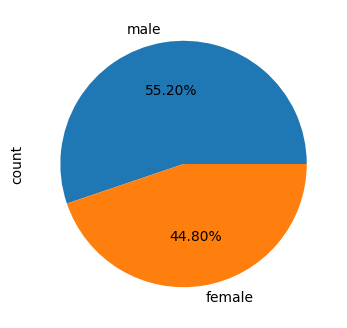

In [7]:
plt.figure(figsize =(4,4))
df['person_gender'].value_counts().plot(kind ='pie',autopct = '%0.2f%%')


<Axes: ylabel='count'>

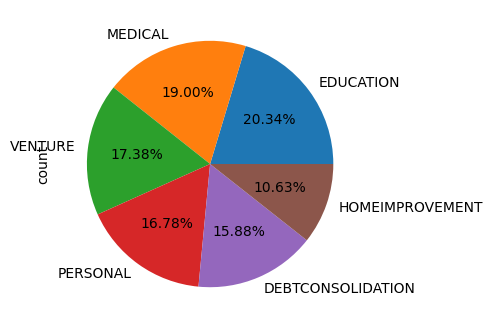

In [8]:
plt.figure(figsize =(4,4))
df['loan_intent'].value_counts().plot(kind ='pie',autopct = '%0.2f%%')


<Axes: ylabel='count'>

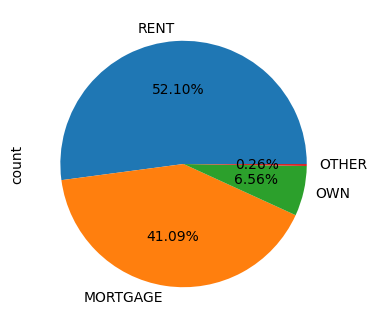

In [9]:
plt.figure(figsize =(4,4))
df['person_home_ownership'].value_counts().plot(kind ='pie',autopct = '%0.2f%%')


<Axes: ylabel='count'>

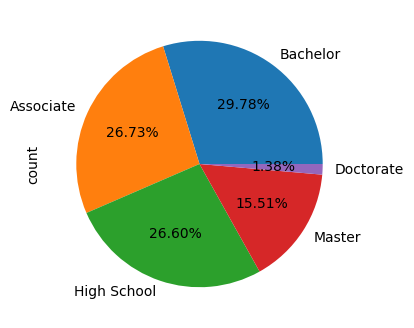

In [10]:
plt.figure(figsize =(4,4))
df['person_education'].value_counts().plot(kind ='pie',autopct = '%0.2f%%')


In [11]:
plt.figure(figsize = (12,12))
dummies = pd.get_dummies(df[['person_gender','person_education','person_emp_exp','person_home_ownership','loan_intent','previous_loan_defaults_on_file','loan_status']],drop_first=True)
correlation = dummies.corr()
loan_corr = correlation['loan_status'].sort_values(ascending=False)
print(loan_corr)


loan_status                           1.000000
person_home_ownership_RENT            0.255239
loan_intent_MEDICAL                   0.065195
loan_intent_HOMEIMPROVEMENT           0.033838
person_home_ownership_OTHER           0.013645
person_education_Bachelor             0.004728
person_education_Doctorate            0.001833
person_education_High School          0.001277
person_gender_male                   -0.000561
person_education_Master              -0.004741
person_emp_exp                       -0.020481
loan_intent_PERSONAL                 -0.022488
loan_intent_EDUCATION                -0.064006
loan_intent_VENTURE                  -0.085992
person_home_ownership_OWN            -0.093666
previous_loan_defaults_on_file_Yes   -0.543096
Name: loan_status, dtype: float64


<Figure size 1200x1200 with 0 Axes>

<Axes: xlabel='loan_status', ylabel='credit_score'>

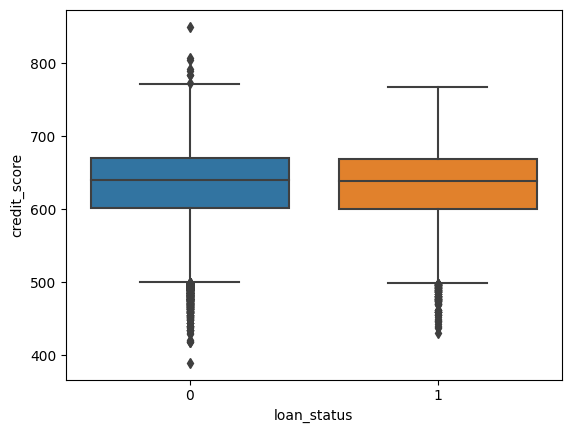

In [12]:
sns.boxplot(x='loan_status', y='credit_score', data=df)

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

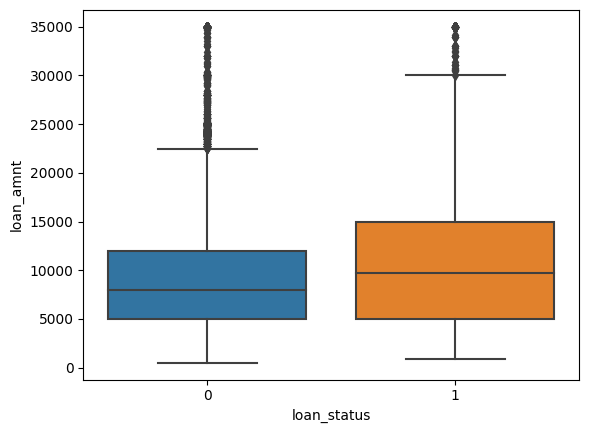

In [13]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

<Axes: xlabel='loan_status', ylabel='person_income'>

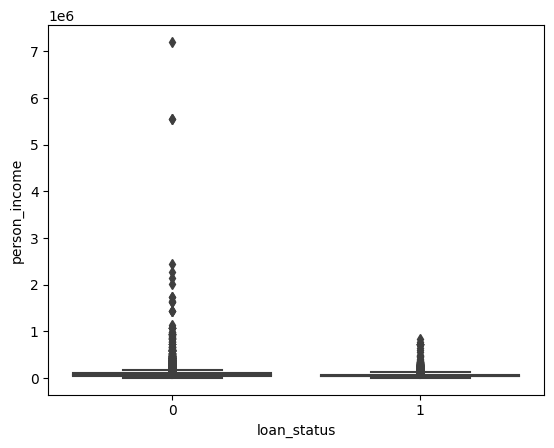

In [14]:
sns.boxplot(x='loan_status', y='person_income', data=df)

<Axes: xlabel='previous_loan_defaults_on_file', ylabel='count'>

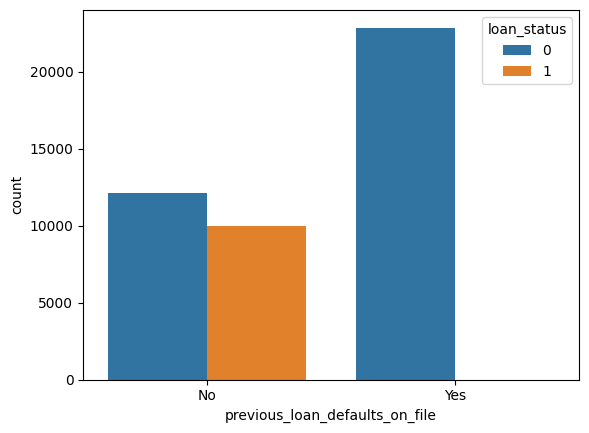

In [15]:
sns.countplot(x='previous_loan_defaults_on_file', hue='loan_status', data=df)

Text(0.5, 1.0, 'Age vs. Credit Score (colored by Loan Status)')

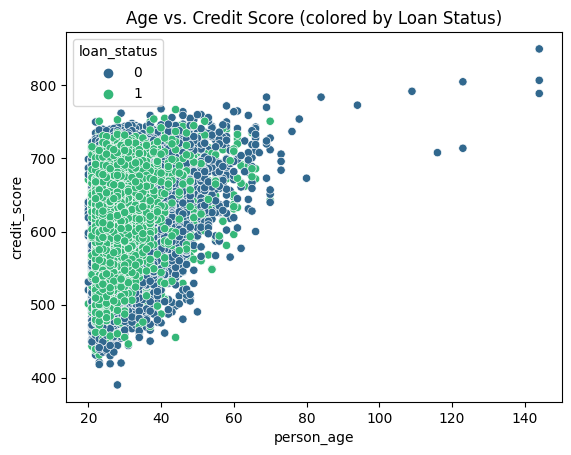

In [16]:
sns.scatterplot(x='person_age', y='credit_score', hue='loan_status', data=df, palette='viridis')
plt.title("Age vs. Credit Score (colored by Loan Status)")

Text(0.5, 1.0, 'Employment Experience vs. Loan Percent Income by Loan Status')

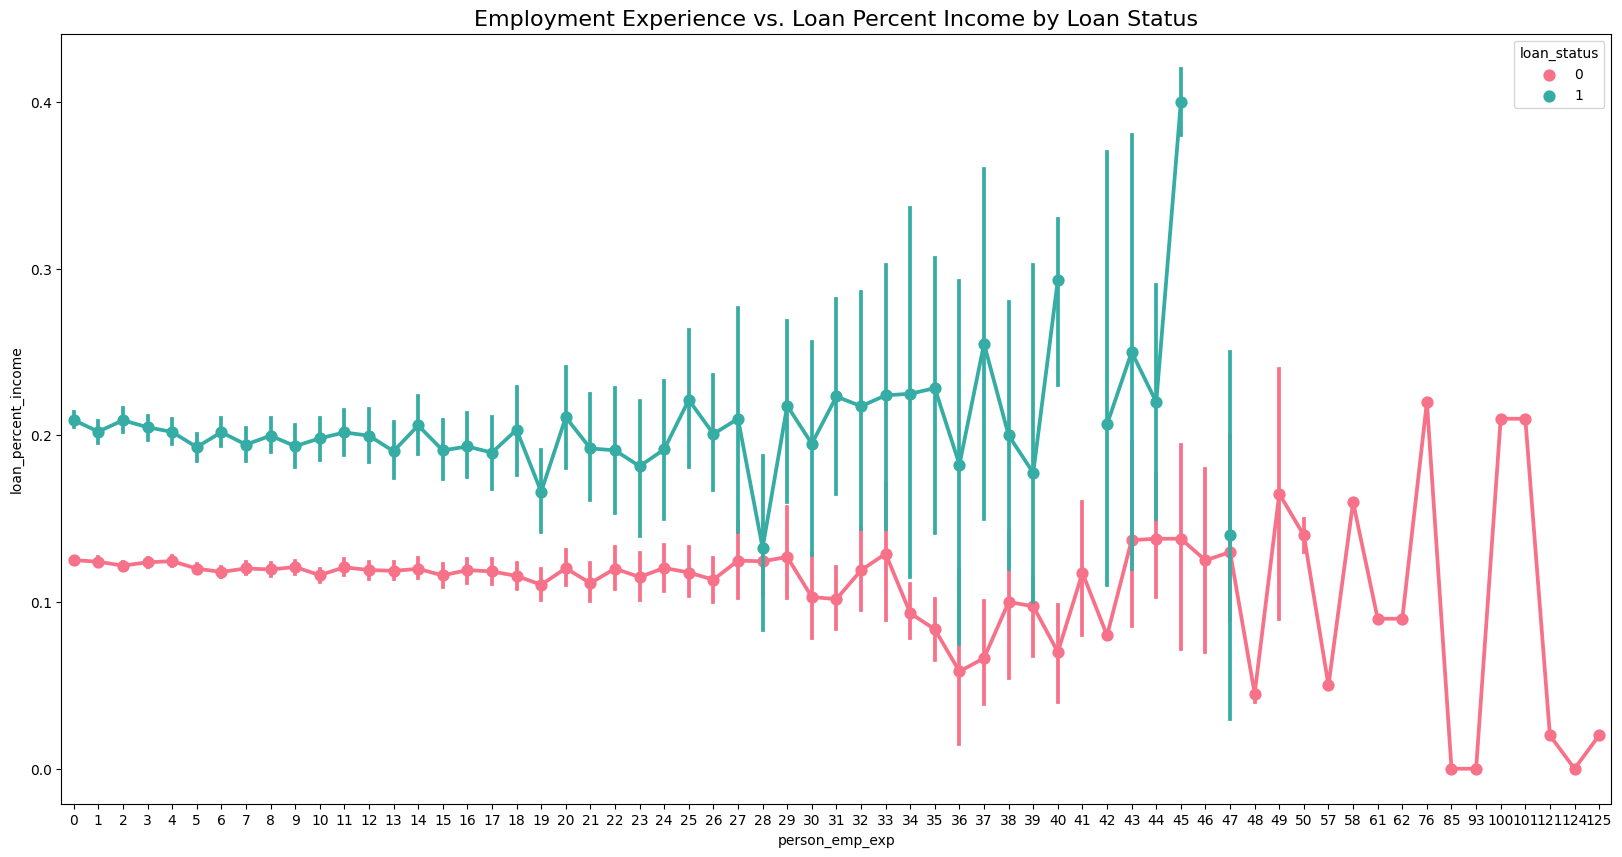

In [17]:
plt.figure(figsize =(20,10))
sns.pointplot(x='person_emp_exp', y='loan_percent_income', hue='loan_status', data=df, palette='husl')
plt.title("Employment Experience vs. Loan Percent Income by Loan Status",fontsize = 16)

Text(0.5, 1.0, 'Income vs. Credit Score Density by Loan Status')

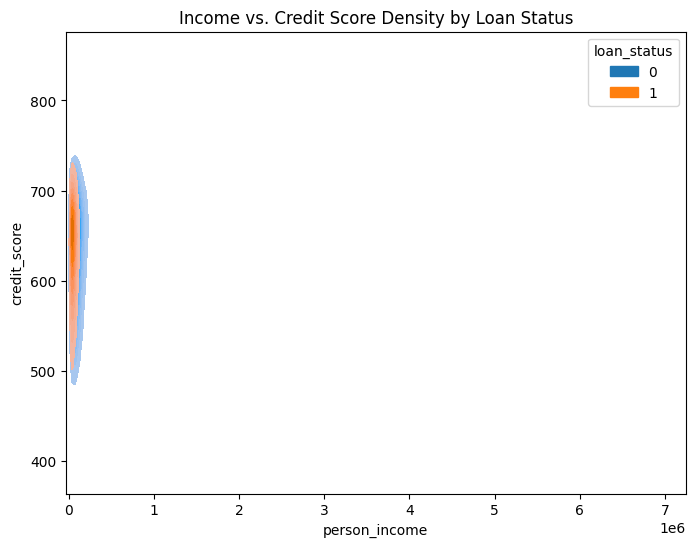

In [18]:
plt.figure(figsize=(8,6))
sns.kdeplot(x='person_income', y='credit_score', hue='loan_status', data=df, fill=True, cmap='coolwarm', thresh=0.1)
plt.title("Income vs. Credit Score Density by Loan Status")

# Label Encoding : Label Encoder

In [19]:
cat_features = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for feature in cat_features:
    df[feature] = le.fit_transform(df[feature])

In [20]:
x = df.drop('loan_status', axis = 1)
y = df['loan_status']

In [21]:
x_train ,x_test , y_train,y_test = train_test_split(x , y,test_size = 0.2, random_state =26)

In [22]:
x_train

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
10450,23.0,1,4,64253.0,2,0,8000.0,3,16.29,0.12,2.0,498,0
27990,29.0,1,3,121261.0,5,2,10000.0,4,6.92,0.08,8.0,649,0
42874,33.0,0,1,69386.0,13,0,10000.0,3,15.64,0.14,8.0,635,0
11813,24.0,1,3,102812.0,2,3,10000.0,4,16.00,0.10,3.0,601,1
33212,26.0,1,0,67064.0,4,0,5000.0,5,7.67,0.07,4.0,672,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23629,29.0,0,3,71456.0,10,0,8000.0,5,16.77,0.11,8.0,493,0
24275,35.0,1,0,64466.0,12,3,4200.0,2,11.71,0.07,6.0,673,0
10177,23.0,0,0,79373.0,1,2,18000.0,3,10.99,0.23,4.0,621,0
42416,23.0,1,1,90848.0,0,3,16995.0,2,16.03,0.19,4.0,623,0


# Data Scaling : Standard Scaler

In [23]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [24]:
x_train_scaled

array([[-0.7895967 ,  0.90265749,  1.52778085, ..., -0.99819463,
        -2.66821346, -1.014945  ],
       [ 0.20578039,  0.90265749,  0.85162203, ...,  0.54923845,
         0.32275992, -1.014945  ],
       [ 0.86936511, -1.10783992, -0.5006956 , ...,  0.54923845,
         0.04545113, -1.014945  ],
       ...,
       [-0.7895967 , -1.10783992, -1.17685442, ..., -0.48238361,
        -0.23185766, -1.014945  ],
       [-0.7895967 ,  0.90265749, -0.5006956 , ..., -0.48238361,
        -0.19224212, -1.014945  ],
       [ 2.52832693, -1.10783992,  1.52778085, ...,  2.09667153,
        -0.88551409,  0.98527507]])

# Model : Random Forest Classifier

In [25]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train_scaled , y_train)

RandomForestClassifier(random_state=42)

In [26]:
y_pred = rf_model.predict(x_test_scaled)

In [27]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

# Accuracy Score : 0.9292222222222222

In [28]:
print(f"Accuracy Score : {accuracy_score(y_test , y_pred)}\n")
print(f"lassification Report :\n{classification_report(y_test , y_pred)}")

Accuracy Score : 0.9292222222222222

lassification Report :
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6964
           1       0.89      0.78      0.83      2036

    accuracy                           0.93      9000
   macro avg       0.92      0.88      0.89      9000
weighted avg       0.93      0.93      0.93      9000



# Thank You!